In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

# #Первичный анализ данных в столбцах.

In [67]:
#  получим общую информацию от столбцах в датасете
display(stud.head(15))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [68]:
#  изменяем составное наименование столбца на простое
stud.rename(columns = {'studytime, granular':'granular'}, inplace = True) #  переименование столбца

In [69]:
#  узнаем сколько пропущенных значений имеет каждый столбец
print(stud.isna().sum())

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
granular       7
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64


In [34]:
В нашем случае в датасете всего 395 строк, при таком кол-ве строк
пропуск значений более чем 10%(~ 40 значений) это достаточно значимое кол-во
и если заменить пропуски в этих столбцах то это может
привести к ошибочным выводам по значимости этих столбцов.
И главное что в нашем целевом столбце 'score' имеются пропуски, что тоже плохо.
Необходимо исключить строки с пропущенным значением в столбце 'score'.

SyntaxError: invalid syntax (<ipython-input-34-4e28445a125b>, line 1)

In [70]:
#  исключаем строки с пустыми значениями в столбце "score"
stud= stud[stud['score']>=0]
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

In [71]:
#  проверяем в каких столбцах пропущеных значений более 10%
print(stud.isna().sum()<40)

school         True
sex            True
age            True
address        True
famsize        True
Pstatus       False
Medu           True
Fedu           True
Mjob           True
Fjob           True
reason         True
guardian       True
traveltime     True
studytime      True
failures       True
schoolsup      True
famsup         True
paid           True
activities     True
nursery        True
granular       True
higher         True
internet       True
romantic       True
famrel         True
freetime       True
goout          True
health         True
absences       True
score          True
dtype: bool


In [ ]:
Столбцы 'Pstatus' можно исключить из анализа.

In [ ]:
Заполним пропущенные значения.
Заполнять будем двумя методами interpolate и fillna.
Для каждого метода создадим функцию

In [72]:
#  функция заполнения пропущеных значений уже существующими значением
def fill_by_interpolate (col):
    stud[col].interpolate(method='pad',inplace=True)

#  функция заполнения пропущеных значений модой выбранного столбца
def fill_by_mode(col):
    stud[col].fillna(stud[col].mode()[0], inplace=True)

#  заполняем пропуски
for col in stud.columns:
    fill_by_interpolate(col)
    
for col in stud.columns:
    fill_by_mode(col)

In [73]:
#  проверка на наличие пропущеных значений
display(stud.head(15))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,A,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,LE3,A,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     389 non-null    object 
 4   famsize     389 non-null    object 
 5   Pstatus     389 non-null    object 
 6   Medu        389 non-null    float64
 7   Fedu        389 non-null    float64
 8   Mjob        389 non-null    object 
 9   Fjob        389 non-null    object 
 10  reason      389 non-null    object 
 11  guardian    389 non-null    object 
 12  traveltime  389 non-null    float64
 13  studytime   389 non-null    float64
 14  failures    389 non-null    float64
 15  schoolsup   389 non-null    object 
 16  famsup      389 non-null    object 
 17  paid        389 non-null    object 
 18  activities  389 non-null    object 
 19  nursery     389 non-null    o

In [ ]:
Подготовим набор функций для дальнейшего анализа.

In [93]:
#  функция для определения границ выбросов
def outliers (num_col):
    IQR = stud[num_col].quantile(0.75) - stud[num_col].quantile(0.25)
    perc25 = stud[num_col].quantile(0.25)
    perc75 = stud[num_col].quantile(0.75)
    f = perc25 - 1.5*IQR
    l = perc75 + 1.5*IQR
    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{},{}]".format(f, l))

#  функция для замены выбросов на моду
def fill_outliers(num_col):
    IQR = stud[num_col].quantile(0.75) - stud[num_col].quantile(0.25)
    perc25 = stud[num_col].quantile(0.25)
    perc75 = stud[num_col].quantile(0.75)
    f = perc25 - 1.5*IQR
    l = perc75 + 1.5*IQR
    mode_col = stud[num_col].mode()[0]
    stud[num_col] = stud[num_col].apply(
        lambda x: mode_col if x > l or x < f else x)

# Анализ числовых данных.

In [74]:
#  выделим перечень столбцов с числовыми данными
num_cols = stud.select_dtypes(exclude = [np.object]).columns
num_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'granular', 'famrel', 'freetime', 'goout', 'health', 'absences',
       'score'],
      dtype='object')

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64


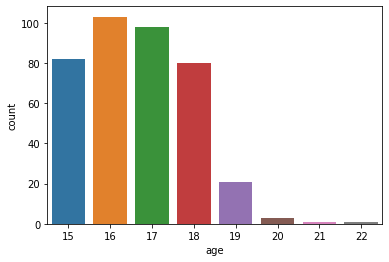

In [77]:
#  колонка "age"
#  возраст ученика (от 15 до 22)
sns.countplot(x = stud['age'], data = stud)
print(stud.age.value_counts())

Все данные в пределах допустимого.

4.0    132
2.0    101
3.0     96
1.0     57
0.0      3
Name: Medu, dtype: int64


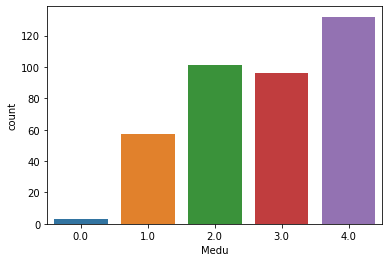

In [78]:
#  колонка "Medu"
#  образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
sns.countplot(x = stud['Medu'], data = stud)
print(stud.Medu.value_counts())

Все данные в пределах допустимого.

2.0     111
3.0     103
4.0      92
1.0      80
0.0       2
40.0      1
Name: Fedu, dtype: int64


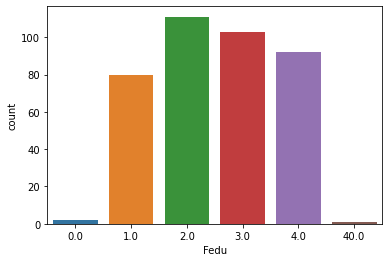

In [79]:
#  колонка "Fedu"
#  образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
sns.countplot(x = stud['Fedu'], data = stud)
print(stud.Fedu.value_counts())

Значение 40 является выбросом и есть смысл заменить его на 4, возможно произошла ошибка и вместо 4 внесли в фаил 40.

In [80]:
stud.loc[stud['Fedu'] == 40,'Fedu'] = 4
print(stud.Fedu.value_counts())

2.0    111
3.0    103
4.0     93
1.0     80
0.0      2
Name: Fedu, dtype: int64


1.0    257
2.0    101
3.0     24
4.0      7
Name: traveltime, dtype: int64


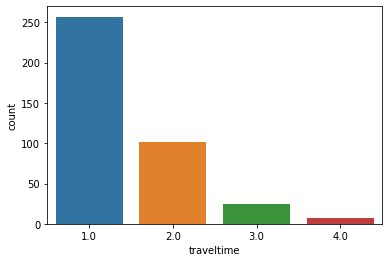

In [81]:
#  колонка "traveltime"
#  время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
sns.countplot(x = stud['traveltime'], data = stud)
print(stud.traveltime.value_counts())

In [ ]:
Все данные в пределах допустимого.

2.0    192
1.0    104
3.0     66
4.0     27
Name: studytime, dtype: int64


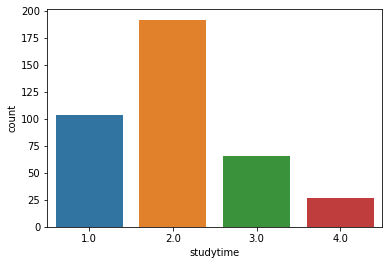

In [82]:
#  колонка "studytime"
#  время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
sns.countplot(x = stud['studytime'], data = stud)
print(stud.studytime.value_counts())

Все данные в пределах допустимого.

0.0    308
1.0     50
2.0     16
3.0     15
Name: failures, dtype: int64


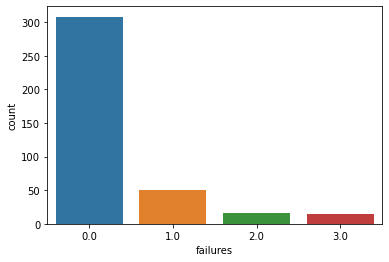

In [83]:
#  колонка "failures"
#  количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
sns.countplot(x = stud['failures'], data = stud)
print(stud.failures.value_counts())

Все данные в пределах допустимого.

<AxesSubplot:xlabel='granular', ylabel='count'>

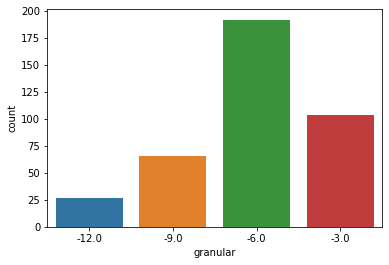

In [84]:
#  колонка "granular"
#  информации по данной колонки нет
sns.countplot(x = stud['granular'], data = stud)

 4.0    188
 5.0    108
 3.0     68
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


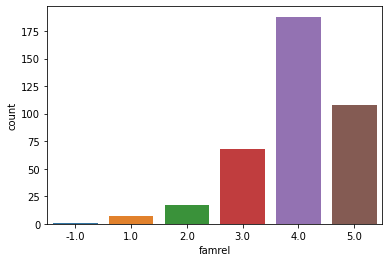

In [85]:
#  колонка "famrel"
#  семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
sns.countplot(x = stud['famrel'], data = stud)
print(stud.famrel.value_counts())

Значение -1 является выбросом и есть смысл заменить его на 1, возможно произошла ошибка и вместо 1 внесли в фаил -1.

In [86]:
stud.loc[stud['famrel'] == -1,'famrel'] = 1
print(stud.famrel.value_counts())

4.0    188
5.0    108
3.0     68
2.0     17
1.0      8
Name: famrel, dtype: int64


3.0    155
4.0    112
2.0     67
5.0     37
1.0     18
Name: freetime, dtype: int64


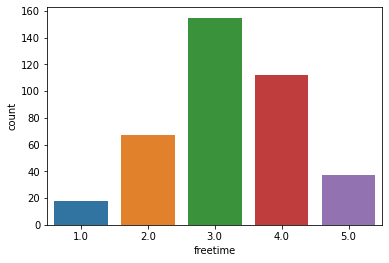

In [87]:
#  колонка "freetime"
#  свободное время после школы (от 1 - очень мало до 5 - очень мого)
sns.countplot(x = stud['freetime'], data = stud)
print(stud.freetime.value_counts())

Все данные в пределах допустимого.

3.0    126
2.0    105
4.0     81
5.0     54
1.0     23
Name: goout, dtype: int64
None


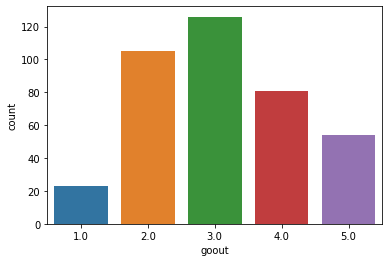

In [88]:
#  колонка "goout"
#  проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
sns.countplot(x = stud['goout'], data = stud)
print(stud.goout.value_counts())

Все данные в пределах допустимого.

5.0    140
3.0     90
4.0     63
1.0     51
2.0     45
Name: health, dtype: int64


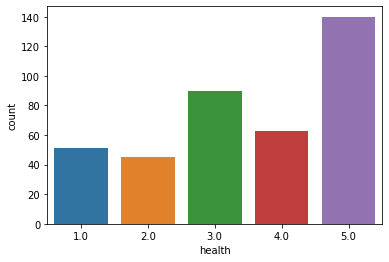

In [89]:
#  колонка "health"
#  текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
sns.countplot(x = stud['health'], data = stud)
print(stud.health.value_counts())

In [ ]:
Все данные в пределах допустимого.

0.0      115
2.0       62
4.0       52
6.0       31
8.0       20
10.0      18
12.0      13
14.0      13
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


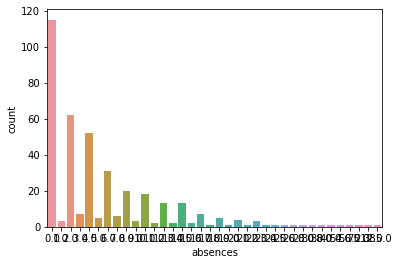

In [90]:
#  колонка "absences"
#  количество пропущенных занятий
sns.countplot(x = stud['absences'], data = stud)
print(stud.absences.value_counts())

Присутствуют выбросы.

In [94]:
#  определяем границы выбросов
outliers('absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0,20.0]


In [97]:
#  заменяем выбросы на значения границ выбросов
fill_outliers('absences')
stud.absences.value_counts()

0.0     150
2.0      62
4.0      52
6.0      31
8.0      20
10.0     18
12.0     13
14.0     13
3.0       7
7.0       6
5.0       5
9.0       3
1.0       3
11.0      2
15.0      2
13.0      2
Name: absences, dtype: int64

0.0     150
2.0      62
4.0      52
6.0      31
8.0      20
10.0     18
12.0     13
14.0     13
3.0       7
7.0       6
5.0       5
9.0       3
1.0       3
11.0      2
15.0      2
13.0      2
Name: absences, dtype: int64


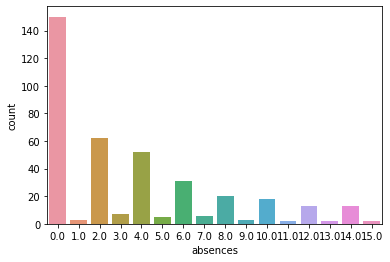

In [98]:
sns.countplot(x = stud['absences'], data = stud)
print(stud.absences.value_counts())

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


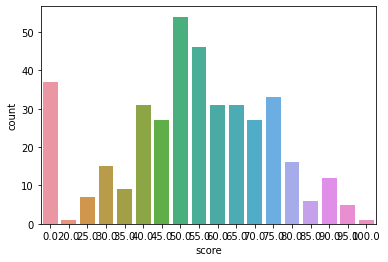

In [100]:
#  колонка "score "
#  баллы по госэкзамену по математике
sns.countplot(x = stud['score'], data = stud)
print(stud.score .value_counts())

In [ ]:
Все данные в пределах допустимого.

# Корреляционный анализ.

In [102]:
#  cтроим матрицу корреляций
stud_corr = stud.corr()

<AxesSubplot:title={'center':'Covariance Matrix'}>

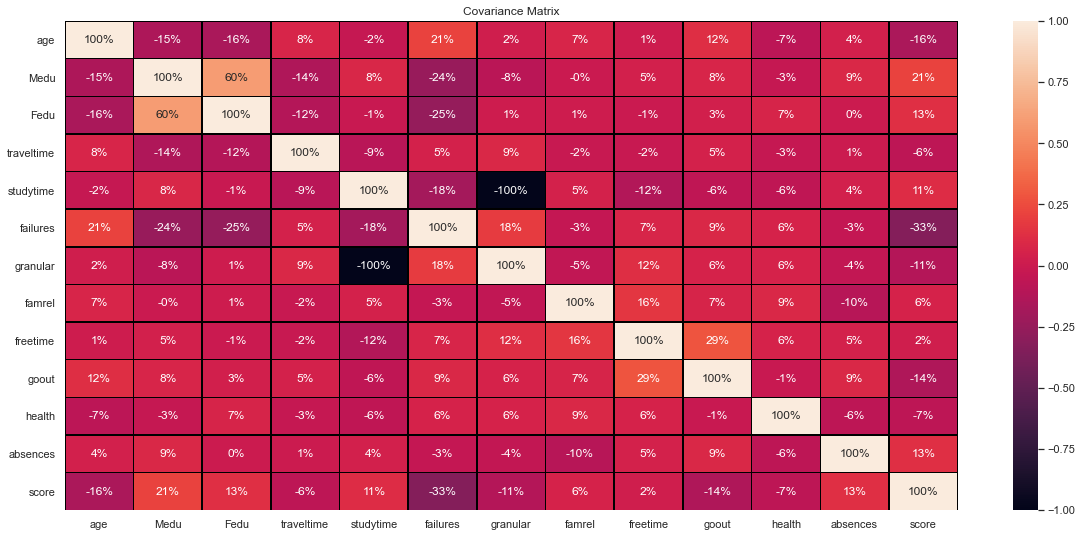

In [103]:
#  строим тепловую карту
sns.set(style = 'white')
plt.figure(figsize = (20, 9))
plt.title('Covariance Matrix')
sns.heatmap(stud_corr, mask = stud_corr.isnull(), annot = True,
            fmt = '.0%', linewidths = 0.5, linecolor = 'black')

Столбец 'granular' имеет полную обратную корреляцию со столбцом 'studytime', поэтому его можно исключить из дальнейшего анализа

In [104]:
#  cтроим новую матрицу корреляций
stud_corr = stud.loc[:, [x for x in stud_corr.columns if x != 'granular' ]].corr()

<AxesSubplot:title={'center':'Covariance Matrix'}>

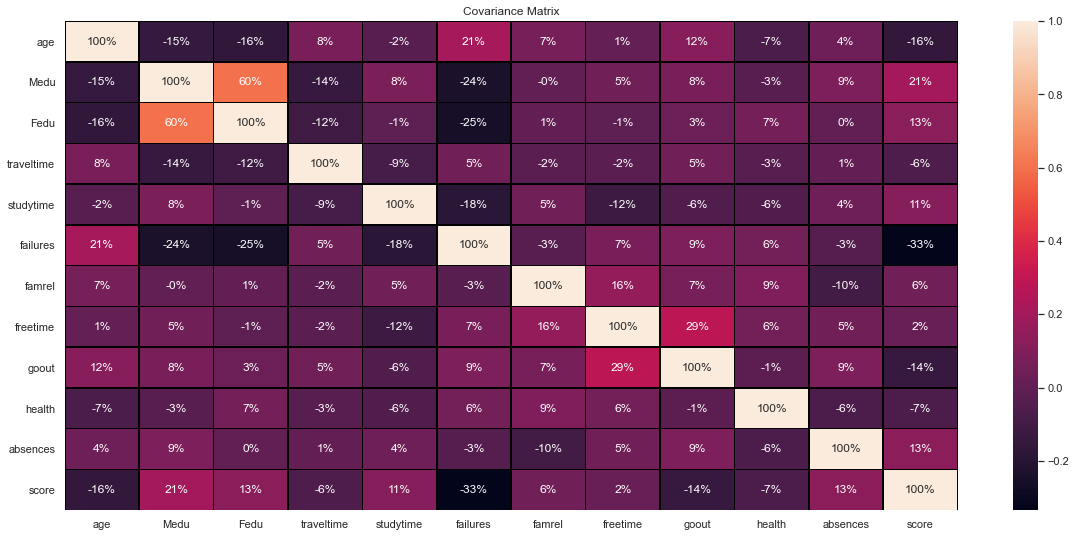

In [106]:
sns.set(style = 'white')
plt.figure(figsize = (20, 9))
plt.title('Covariance Matrix')
sns.heatmap(stud_corr, mask = stud_corr.isnull(), annot = True,
            fmt = '.0%', linewidths = 0.5, linecolor = 'black')

Из этой матрицы корреляций нельзя сделать вывод о сильном влиянии какого-то одного признака на значение score, но несколько переменных хоть и слабо но корелируют, это: 'age', 'Medu', 'Fedu', 'studytime', 'failures' и 'goout'. Для дальнешего анализа оставим только эти числовые столбцы.

In [111]:
#  cоздаем функцию для просмотра всех не числовых столбцов
def info_obj_columns(obj_col):
    obj_info = stud[obj_col].value_counts()

obj_cols = stud.select_dtypes(include = [np.object]).columns
for obj_col in obj_cols:
    info_obj_columns(obj_col)

In [114]:
#  функцию для создания боксплотов
def get_boxplot(obj_col):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = obj_col , y = 'score', 
                data = stud,
               ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + obj_col)
    plt.show()

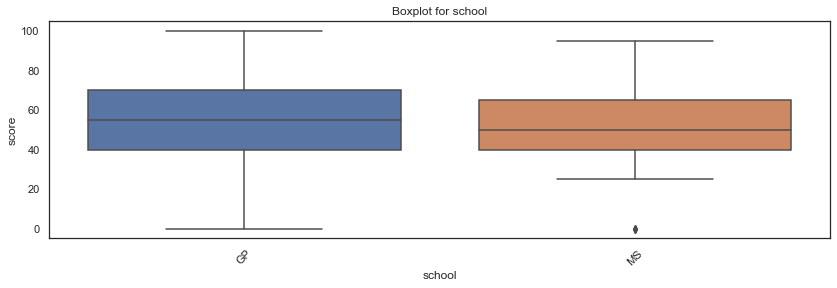

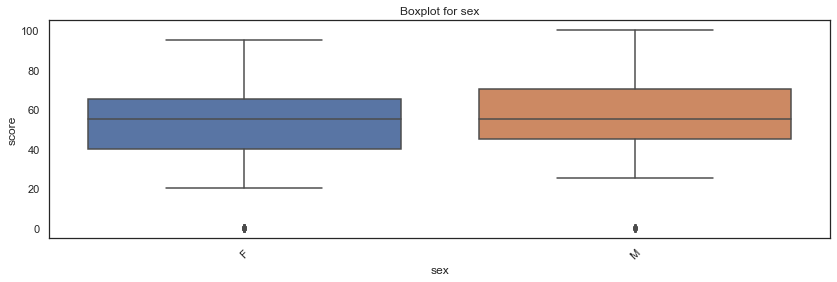

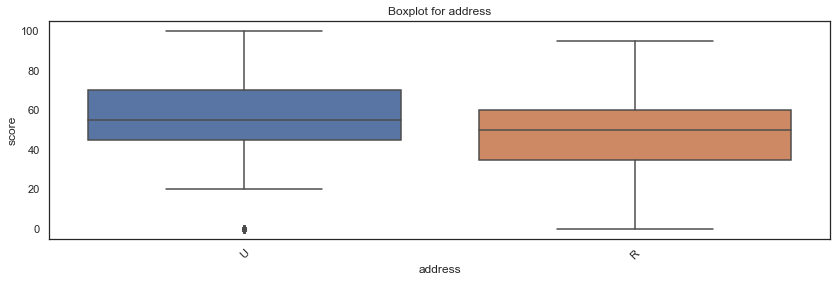

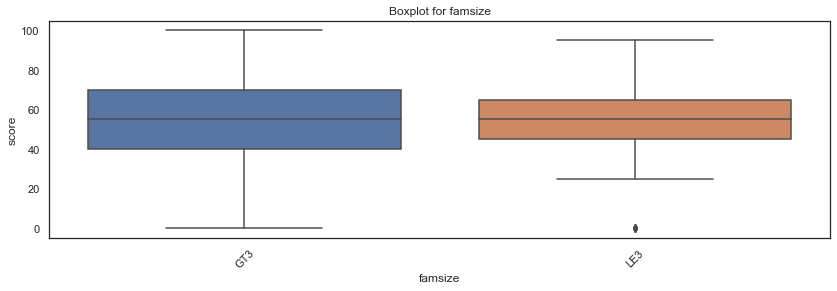

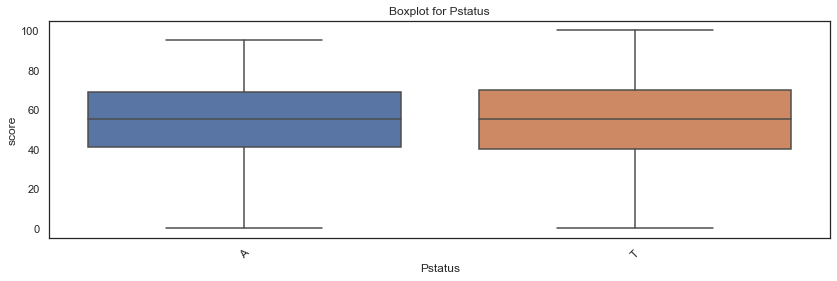

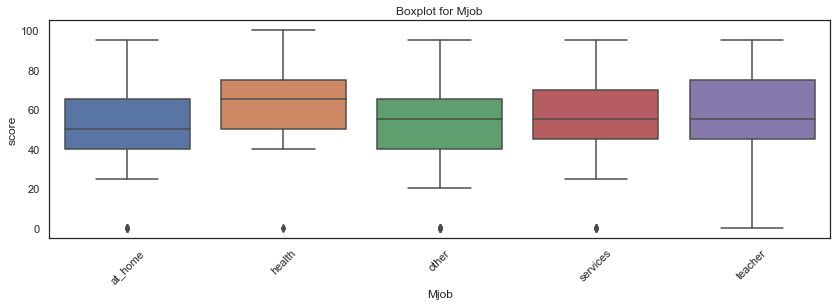

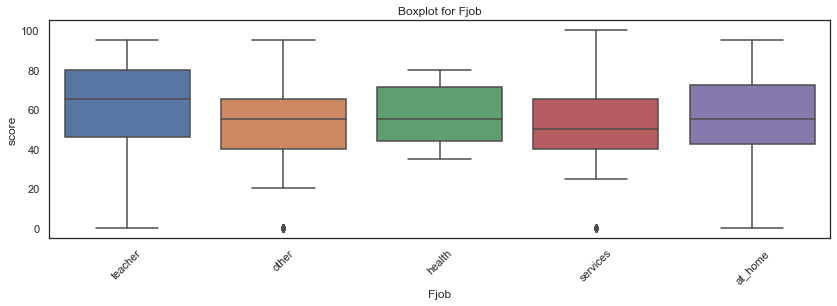

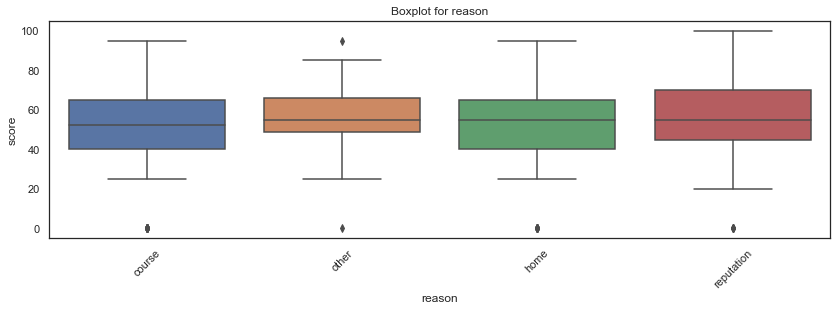

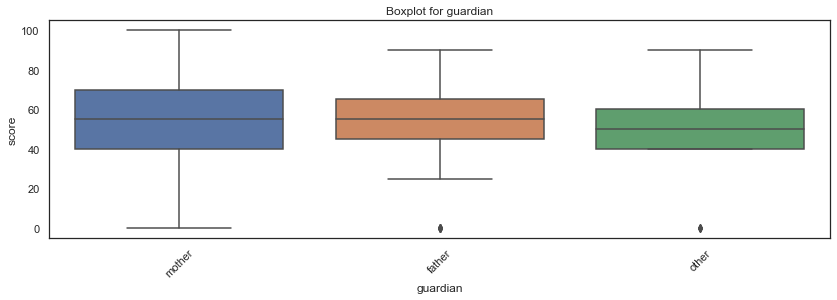

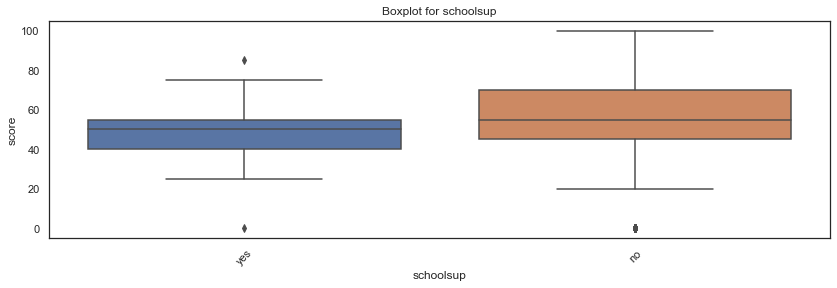

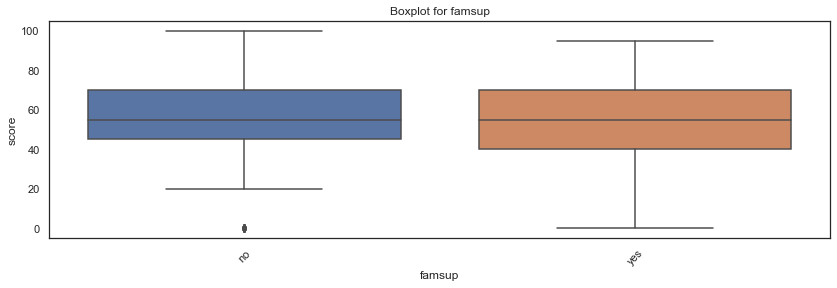

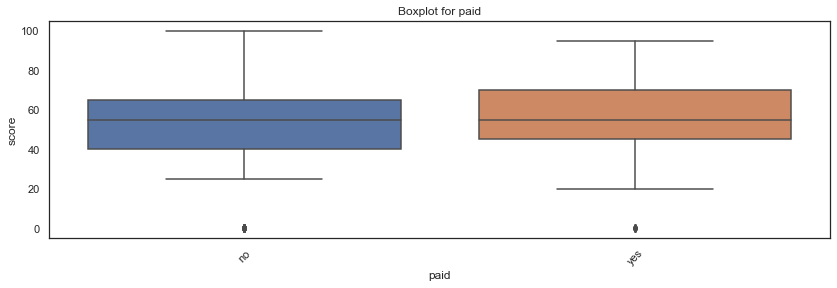

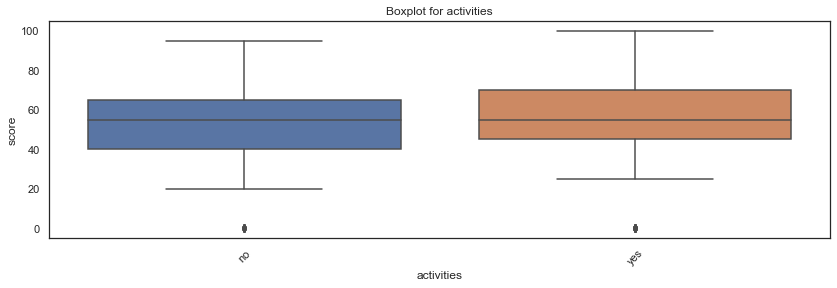

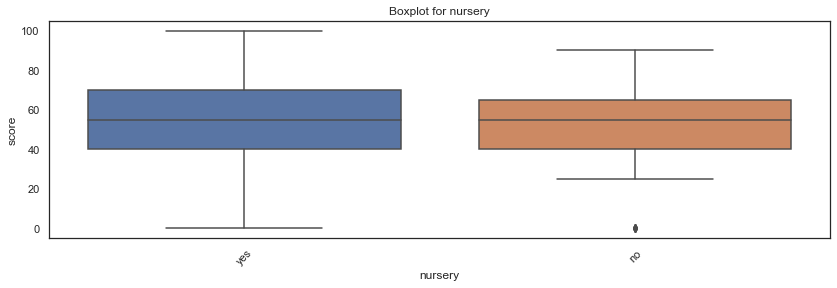

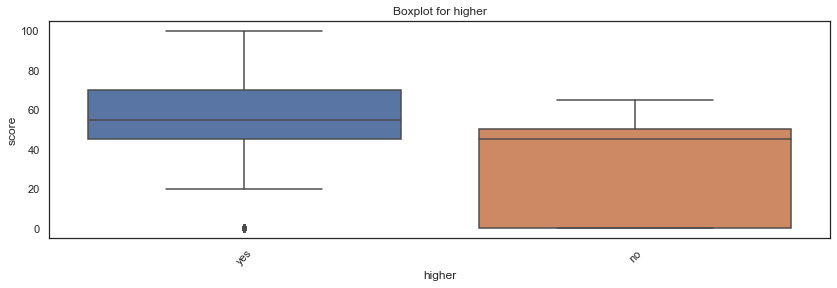

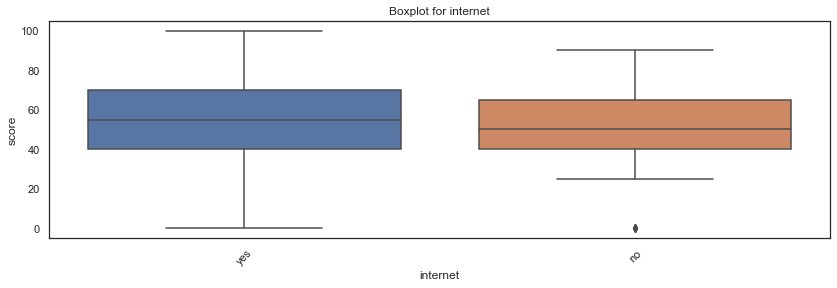

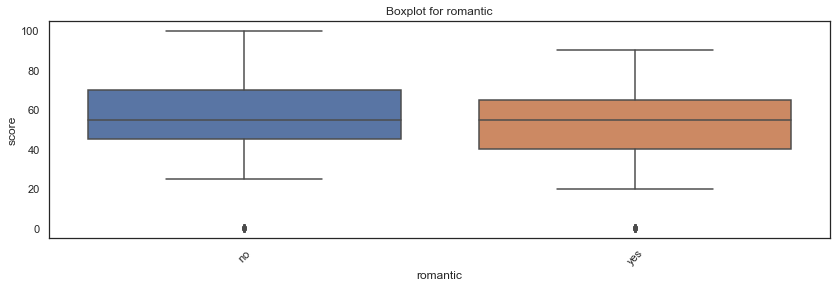

In [115]:
for obj_col in obj_cols:
    get_boxplot(obj_col)

По боксплотам видны различия столбцах adress, Mjob, Fjob, higher и scoolsup, но следует проверить значимы ли статистически эти различия при помощи теста Стьюдента

In [118]:
#  функция теста Стьюдента
def get_stat_dif(obj_col):
    cols = stud.loc[:, obj_col].value_counts().index[:2]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, obj_col] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, obj_col] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', obj_col)
            break

In [119]:
for obj_col in obj_cols:
    get_stat_dif(obj_col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки reason
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Составляем итоговый датафрейм из числовых столбцов показавших корреляцию выше 10% и не числовых столбцов у которых найдены статистически значимые различия.

In [121]:
col_list = ['address','reason', 'higher', 'romantic','age',
            'Medu', 'Fedu','studytime', 'failures',
            'goout','score']

In [123]:
stud = stud[col_list]
stud

,address,reason,higher,romantic,age,Medu,Fedu,studytime,failures,goout,score
0,U,course,yes,no,18,4.0,4.0,2.0,0.0,4.0,30.0
1,U,course,yes,no,17,1.0,1.0,2.0,0.0,3.0,30.0
2,U,other,yes,no,15,1.0,1.0,2.0,3.0,2.0,50.0
3,U,home,yes,yes,15,4.0,2.0,3.0,0.0,2.0,75.0
4,U,home,yes,no,16,3.0,3.0,2.0,0.0,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
390,U,course,yes,no,20,2.0,2.0,2.0,2.0,4.0,45.0
391,U,course,yes,no,17,3.0,1.0,1.0,0.0,5.0,80.0
392,R,course,yes,no,21,1.0,1.0,1.0,3.0,3.0,35.0
393,R,course,yes,no,18,3.0,2.0,1.0,0.0,1.0,50.0


# Вывод

Из 30 столбцов в исходном датасете только 10 признаков оказывают существенное влияние на переменную score.